In [12]:
from sympy import sympify, symbols, Symbol
from sympy.parsing.sympy_parser import parse_expr, standard_transformations, implicit_multiplication_application

expr = sympify("x**2 + 3*x - 4")  # String → Expresión simbólica
expr = sympify("sin(x) + exp(2*x)")  # Reconoce funciones matemáticas

# uso de formatos que sympy provee para manejar el parseo
transformations = (standard_transformations + 
                   (implicit_multiplication_application,))
expr = parse_expr("2x + 3", transformations=transformations)

In [13]:
expr

2*x + 3

In [3]:
def detect_variables(expr_str: str):
    """ Detecta las variables de una funcion de una variable"""
    expr = sympify(expr_str)
    free_symbols = expr.free_symbols

    if len ( free_symbols ) == 0:
        raise ValueError(" No hay variables en la expresion ")
    elif len( free_symbols ) > 1:
        raise ValueError(" Hay mas de una variable en la expresion ")
    else:
        return list( free_symbols ) [0]


In [4]:
detect_variables("r^2 + r-2")
sympify("r^2 + r-2")

r**2 + r - 2

In [5]:
from sympy import diff

x = symbols( 'x' )
# clasico
expr = sympify ( "cos(x) + sin(x)" )
df = diff(expr)

# uso mas parametros o combinacion
dff1 = diff(df)
dff2 = diff(expr,x,2)

# mas parametrizado
n = 3
dfn = diff( expr, x, n )

dfn


sin(x) - cos(x)

In [6]:
expr = sympify("3**x + 2", locals = {'x': x})
expr

3**x + 2

In [7]:
def get_derivatives(self, orden: int = 1):
    return diff( self.sympy_exp, self.sympy_variable ,orden )

In [8]:
from sympy import lambdify
import numpy as np

x = symbols('x')
transformations = (standard_transformations + 
                   (implicit_multiplication_application,))
expr = parse_expr("exp x + 3x - sin x", transformations=transformations)
f = lambdify(x, expr, 'numpy')
#lambdify?
f(2.313)


np.float64(16.30671245259543)

Text(0.5, 1.0, '$f(x)=3 x + e^{x} - \\sin{\\left(x \\right)}$')

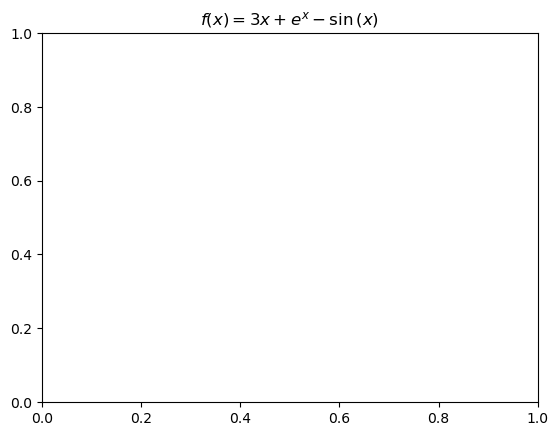

In [9]:
from sympy import latex

expr_str = latex( expr )

import matplotlib.pyplot as plt
plt.title(f"$f(x)={expr_str}$")

In [14]:
from sympy import solve, solveset, S, oo
from sympy.calculus.util import continuous_domain, is_convex

expr = sympify("3*x**4 + 2*x -1")
# encontrar simbolicamente si es posible
try:
    root = solve(expr, x)
except:
    roots = solve(expr)
len(root)
domain = continuous_domain(sympify("1/x"), x, S.Reals)
type(domain)

sympy.sets.sets.Union

In [ ]:
from sympy import Interval
interval = Interval(1, 10)
convex: bool = is_convex(expr, x, domain=Interval(10, oo))
critical_points = solve(diff(expr, x), x)
critical_points

[-6**(2/3)/6,
 6**(2/3)/12 - 2**(2/3)*3**(1/6)*I/4,
 6**(2/3)/12 + 2**(2/3)*3**(1/6)*I/4]

In [ ]:
from sympy import simplify
def analyze_fn_newton(f, x):
    """Analiza si la funcion convergera cuadraticamente con Newton"""
    critical_points = solve(diff(f, x), x)
    for p in critical_points:
        if f.subs(x, p).equals(0):#subs evalua o substituye
            print(f"La raiz $p$ con Newton converge linealmente")
    